In [86]:
import datetime
import pandas as pd
import numpy as np
#%matplotlib  #(in iPython)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

now = datetime.datetime.now()
#DATA_URL = "https://firms.modaps.eosdis.nasa.gov/active_fire/c6/text/MODIS_C6_Global_24h.csv"
DATA_URL = "https://firms.modaps.eosdis.nasa.gov/active_fire/c6/text/MODIS_C6_USA_contiguous_and_Hawaii_24h.csv"
data = pd.read_csv(DATA_URL)
print("Data fetched at " + now.strftime("%Y-%m-%d %H:%M"))

data = data[data['confidence']>50]
data = data[data['brightness']>400]
df = data[['latitude','longitude','brightness','frp','confidence']]

Data fetched at 2019-10-25 16:21


/Users/rchattopadhyay/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


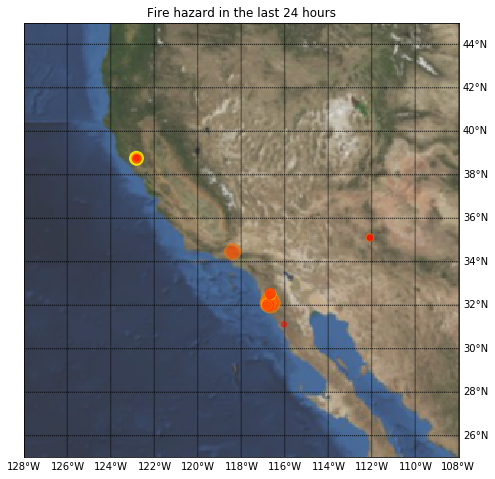

In [87]:
fig, ax = plt.subplots(figsize=(14, 8))

m = Basemap(ax=ax, llcrnrlon=-128.,llcrnrlat=25.,urcrnrlon=-108.,urcrnrlat=45., resolution='h')
#m.drawcoastlines(color='#000000', linewidth=1)
m.bluemarble(alpha=0.8) # for natural color
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='coral',lake_color='aqua')
parallels=np.arange(-80,81,2.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,2.)
m.drawmeridians(meridians,labels=[True,False,False,True])

ax.scatter(x=df['longitude'], y=df['latitude'], 
           s=df['frp'] / 10, label="Power",
           c=df['brightness'] / 10, cmap=plt.get_cmap("autumn"),
           alpha=0.5, zorder=10)
ax.set_title("Fire hazard in the last 24 hours")

fig.savefig('output_eosmodis_fires_'+now.strftime("%Y-%m-%d_%H-%M")+'.png', dpi=350)
plt.show()